In [ ]:
# Classify the email using the binary classification

# method. Email
# Spam detection has two states: a) Normal State – Not
# Spam, b) Abnormal State – Spam. Use K-Nearest
# Neighbors and Support Vector Machine for
# classification. Analyze their performance.
# Dataset link: The emails.csv dataset on the Kaggle

# https://www.kaggle.com/datasets/balaka18/email-spam-
# classificatio n-dataset-csv

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import resample

In [69]:
df = pd.read_csv("/content/emails.csv")

In [70]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [71]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [72]:
df.dropna(inplace= True)

In [73]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [92]:
y.value_counts()

0    3672
1    3304
Name: Prediction, dtype: int64

<Axes: xlabel='Prediction', ylabel='count'>

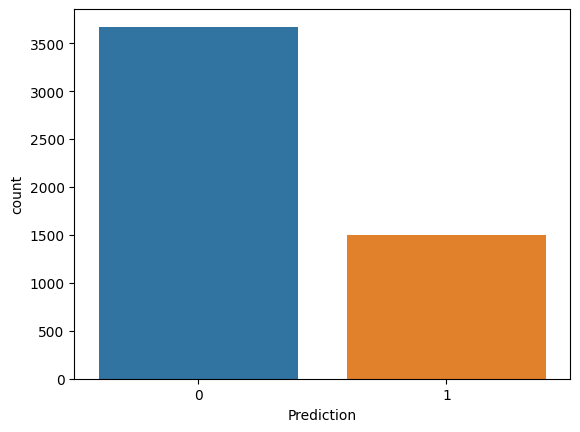

In [93]:
 sns.countplot(data = df, x = df["Prediction"])

In [94]:
negative_data = df[df["Prediction"] == 0]
positive_data = df[df["Prediction"] == 1]

In [95]:
positive_upsample = resample(positive_data,replace=True,n_samples=int(0.9*len(negative_data)),random_state=42)

In [96]:
new_df = negative_data
new_df = new_df.append(positive_upsample)

<ipython-input-96-b932c309fbd4>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(positive_upsample)


In [97]:
new_df.shape

(6976, 3002)

In [98]:
new_df = new_df.sample(frac=1)

In [99]:
# input data
x = new_df.drop(['Email No.', 'Prediction'], axis=1)

#output data
y = new_df['Prediction']

In [100]:
# converting into int64
x = x.astype('int64')
y = y.astype('int64')

<Axes: xlabel='Prediction', ylabel='count'>

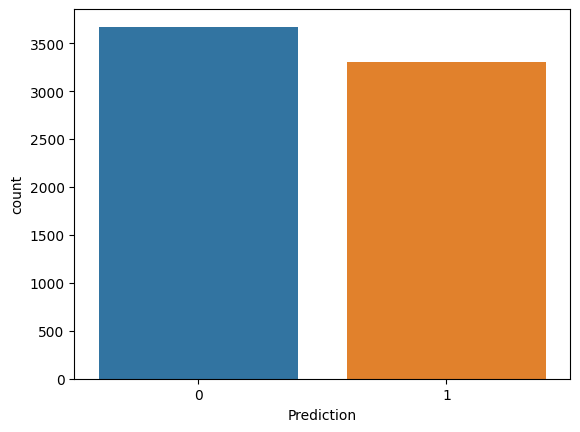

In [101]:
 sns.countplot(x=y)

In [102]:
y.value_counts()

0    3672
1    3304
Name: Prediction, dtype: int64

In [103]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [104]:
#cross validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.25)

In [105]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [106]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [107]:
# predict on test data
y_pred = knn.predict(x_test)

In [108]:
# Evalution metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report


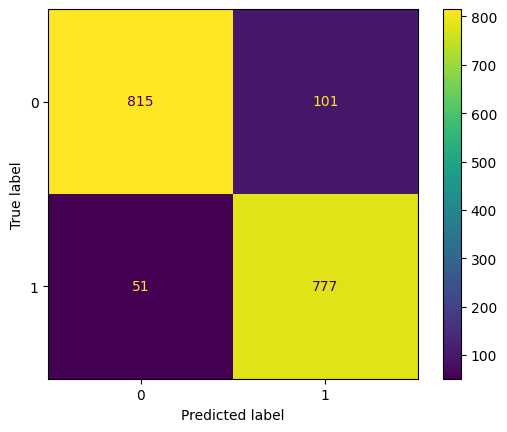

In [109]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [110]:
accuracy_score(y_test,y_pred)

0.9128440366972477

In [111]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       916
           1       0.88      0.94      0.91       828

    accuracy                           0.91      1744
   macro avg       0.91      0.91      0.91      1744
weighted avg       0.91      0.91      0.91      1744



In [ ]:
error = []
for k in range(1,41):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  pred = knn.predict(x_test)
  error.append(np.mean(pred != y_test))

In [ ]:
error

In [ ]:
#SVM
from sklearn.svm import SVC
svm = SVC(kernel='sigmoid')

In [ ]:
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)